In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
    
data = pd.read_csv("abalone.csv")
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]
kf = KFold(n_splits=5, random_state=1, shuffle=True)
for i in range(1, 50):
    regr = RandomForestRegressor(n_estimators = i, random_state = 1)
    fitted = regr.fit(X_data, y_data)
    scores = cross_val_score(fitted, X_data,y_data, scoring='r2', cv = kf)
    if(round(scores.mean(), 2) > 0.52):
        print(i)
        break
    

28


      Iter       Train Loss   Remaining Time 
         1           1.2613           12.17s
         2           1.1715           11.62s
         3           1.1009           11.58s
         4           1.0529           11.53s
         5           1.0130           11.92s
         6           0.9740           11.72s
         7           0.9475           11.74s
         8           0.9197           11.61s
         9           0.8979           11.70s
        10           0.8730           11.66s
        20           0.7207           11.53s
        30           0.6055           11.05s
        40           0.5244           10.60s
        50           0.4501           10.24s
        60           0.3908            9.75s
        70           0.3372            9.20s
        80           0.3009            8.84s
        90           0.2603            8.27s
       100           0.2327            7.74s
       200           0.0835            2.59s
0.6569858986484096
0.5301645204906471


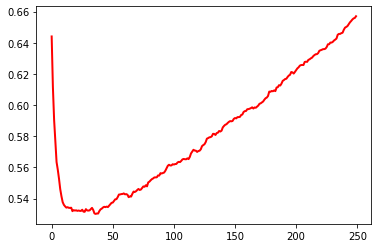

In [12]:
data = pd.read_csv('gbm-data.csv')
Y = data[data.columns[0]].values
X = data[data.columns[1:]].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=241)
# train_loss = np.arange(1, 251)
test_loss = np.empty(250)
booster = GradientBoostingClassifier(n_estimators=250, learning_rate=0.2, random_state=241, verbose=True)
booster.fit(X_train, Y_train)
#for i, y_pred_train in enumerate(booster.staged_predict_proba(X_train)):
   # train_loss[i] = metrics.log_loss(Y_train, y_pred_train)
for m, y_decision in enumerate(booster.staged_decision_function(X_test)):
    y_pred_test = 1.0/(1.0 + np.exp(-y_decision))
    test_loss[m] = log_loss(Y_test, y_pred_test)
print(test_loss.max())
print(test_loss.min())
plt.figure()
# plt.plot(train_loss, 'g', linewidth=2)
plt.plot(test_loss, 'r', linewidth=2)
#plt.legend(['train', 'test'])
plt.show()

In [23]:
regr = RandomForestRegressor(n_estimators = 36, random_state = 241)
regr.fit(X_train, Y_train)
y_pred = regr.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
print(test_loss)

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'